# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [3]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [4]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [5]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [6]:
no_training_epochs = 5

### 1.3 Data examination

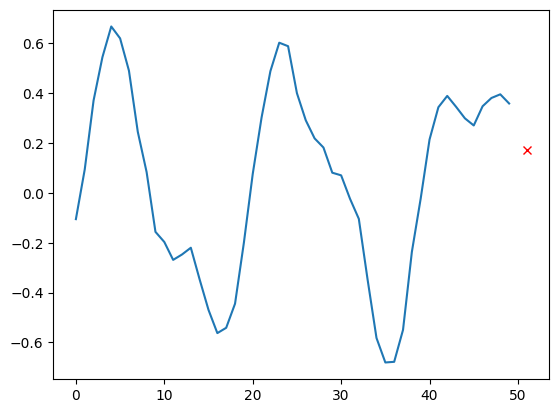

In [7]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [10]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [11]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [12]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 3s 4ms/step - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


In [14]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

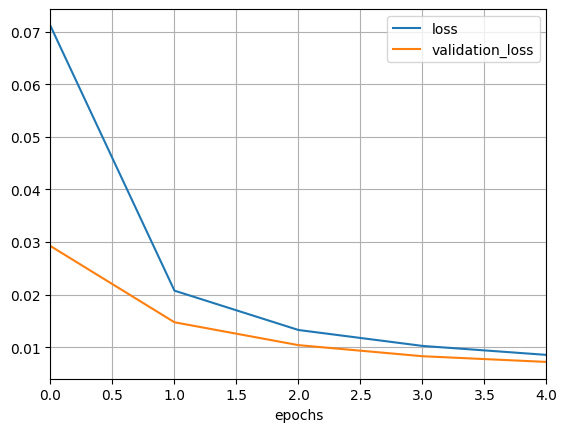

In [15]:
plot_function(history_linear)

In [16]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.006988378241658211
Test MSE:  0.006988378241658211


### 1.5 Simple RNN Model

In [17]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [18]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [19]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 8s 33ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 2/5
219/219 [==============================] - 7s 34ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 3/5
219/219 [==============================] - 8s 34ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 4/5
219/219 [==============================] - 10s 44ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5/5
219/219 [==============================] - 7s 34ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


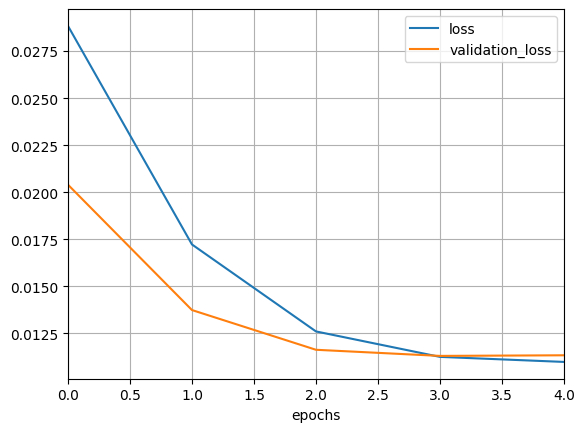

In [20]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [31]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [32]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [33]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 31s 132ms/step - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 2/5
219/219 [==============================] - 28s 130ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 3/5
219/219 [==============================] - 28s 127ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 4/5
219/219 [==============================] - 30s 136ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 5/5
219/219 [==============================] - 29s 131ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


In [29]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0036750901490449905
Test MSE:  0.0036750901490449905


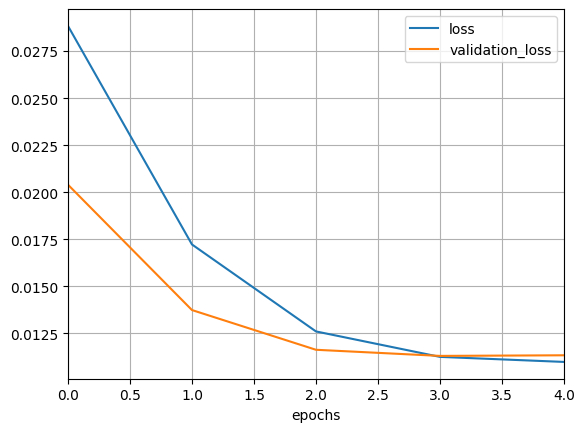

In [30]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [89]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam, Adamax

### 2.1 - Load dataset

In [35]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 2s 0us/step


### 2.2 - Dataset examination

In [36]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 1s 1us/step


In [37]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [38]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [39]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [40]:
X_train.shape

(25000, 150)

In [41]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [42]:
optimizer = Adam(learning_rate = 0.001)

In [43]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 165s 259ms/step - loss: 0.7019 - accuracy: 0.4936 - val_loss: 0.6932 - val_accuracy: 0.5060
Epoch 2/5
625/625 [==============================] - 145s 233ms/step - loss: 0.6970 - accuracy: 0.4976 - val_loss: 0.7000 - val_accuracy: 0.5062
Epoch 3/5
625/625 [==============================] - 143s 228ms/step - loss: 0.6956 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 4/5
625/625 [==============================] - 160s 256ms/step - loss: 0.6959 - accuracy: 0.5019 - val_loss: 0.6935 - val_accuracy: 0.4938
Epoch 5/5
625/625 [==============================] - 148s 236ms/step - loss: 0.6954 - accuracy: 0.4976 - val_loss: 0.6937 - val_accuracy: 0.4938


In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6933633685112
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

## GRU

In [86]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [47]:
optimizer = Adam(learning_rate = 0.001)

In [48]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 43s 62ms/step - loss: 0.6831 - accuracy: 0.5552 - val_loss: 0.6798 - val_accuracy: 0.5740
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 0.6054 - accuracy: 0.6557 - val_loss: 0.4901 - val_accuracy: 0.7626
Epoch 3/5
625/625 [==============================] - 13s 20ms/step - loss: 0.4286 - accuracy: 0.8034 - val_loss: 0.4327 - val_accuracy: 0.7980
Epoch 4/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3876 - accuracy: 0.8249 - val_loss: 0.4369 - val_accuracy: 0.8008
Epoch 5/5
625/625 [==============================] - 10s 17ms/step - loss: 0.3668 - accuracy: 0.8376 - val_loss: 0.3972 - val_accuracy: 0.8240


In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.3776146173477173
Test accuracy:  82.9039990901947 %


## LSTM

In [87]:
embed_size = 128  # default 128
# 64 --> acc = 51%
# 128 --> acc = 80%
# 256 --> acc = 75.89%

vocabulary_size = 1000  # default 1000 --> previous accuracy around 80%
# 500 --> acc = 78.84
# 1000 --> acc = 80%
# 2000 --> acc = 84%

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [96]:
optimizer = Adamax(learning_rate = 0.001)
# switching from Adam to Adamax (it's faster)

In [93]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [94]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 35s 52ms/step - loss: 0.5667 - accuracy: 0.6810 - val_loss: 0.4926 - val_accuracy: 0.7648
Epoch 2/5
625/625 [==============================] - 15s 23ms/step - loss: 0.4153 - accuracy: 0.8146 - val_loss: 0.4179 - val_accuracy: 0.8098
Epoch 3/5
625/625 [==============================] - 13s 21ms/step - loss: 0.3958 - accuracy: 0.8268 - val_loss: 0.4131 - val_accuracy: 0.8128
Epoch 4/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3833 - accuracy: 0.8323 - val_loss: 0.4323 - val_accuracy: 0.8024
Epoch 5/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3789 - accuracy: 0.8345 - val_loss: 0.4115 - val_accuracy: 0.8110


In [95]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.39842143654823303
Test accuracy:  82.11600184440613 %
